In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [60]:
messages = pd.read_csv('SmsCollection.csv', sep=';', names=["label", "message"], skiprows=1)
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [61]:
messages.describe()

,label,message
count,5572,5570
unique,2,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [62]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4823   4505                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [63]:
messages = messages.astype(str)

messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


(array([2.25e+02, 1.51e+03, 9.93e+02, 6.04e+02, 4.42e+02, 3.03e+02,
        3.17e+02, 3.89e+02, 6.23e+02, 6.60e+01, 2.20e+01, 1.20e+01,
        1.70e+01, 1.00e+01, 1.00e+00, 1.10e+01, 5.00e+00, 3.00e+00,
        3.00e+00, 2.00e+00, 3.00e+00, 1.00e+00, 2.00e+00, 3.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 2.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00]),
 array([  2.  ,  20.16,  38.32,  56.48,  74.64,  92.8 , 110.96, 129.12,
        147.28, 165.44, 183.6 , 201.76, 219.92, 238.08, 256.24, 274.4 ,
        292.56, 310.72, 328.88, 347.04, 365.2 , 383.36, 401.52, 419.68,
        437.84, 456.  , 474.16, 492.32, 510.48, 528.64, 546.8 , 564.96,
        583.12, 601.28, 619.44, 637.6 , 655.76, 673.92, 692.08, 710.24,
        728.4 , 746.56, 764.72, 782.88, 801.04, 819.2 , 837.36, 85

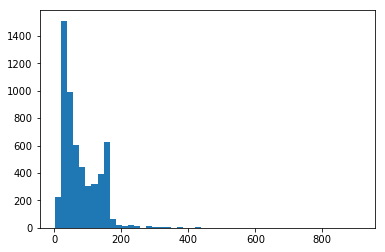

In [64]:
plt.hist(messages['length'],bins=50) 

In [65]:
messages.length.describe()

count    5572.000000
mean       76.935032
std        56.060486
min         2.000000
25%        34.000000
50%        58.000000
75%       116.250000
max       910.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002041DAA0EB0>,
      dtype=object)

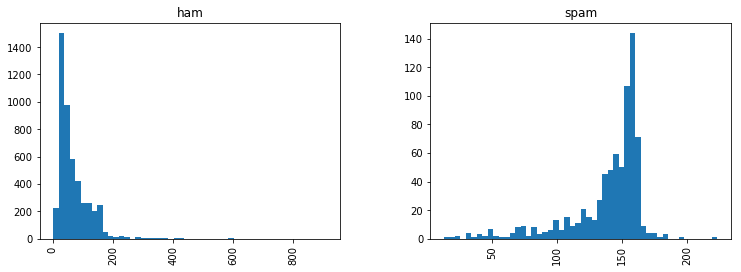

In [66]:

messages.hist(column='length', by='label', bins=50,figsize=(12,4))

In [67]:
print('Ham:\n',messages[messages['label']=='ham'].length.describe())
print('Spam:\n',messages[messages['label']=='spam'].length.describe())

Ham:
 count    4825.000000
mean       67.382798
std        53.090550
min         2.000000
25%        32.000000
50%        50.000000
75%        87.000000
max       910.000000
Name: length, dtype: float64
Spam:
 count    747.000000
mean     138.634538
std       29.002617
min       13.000000
25%      133.000000
50%      149.000000
75%      157.000000
max      223.000000
Name: length, dtype: float64


Average length of spam message is larger

In [68]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [69]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [70]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [78]:
messages['message'].apply(text_process)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: message, Length: 5572, dtype: object

In [79]:
msg_train.apply(text_process)

2407    [One, best, dialogue, cute, reltnship, Wen, Di...
794     [Omg, want, scream, weighed, lost, weight, Woo...
1827    [Dude, Whats, Teresa, Hope, okay, didnt, hear,...
4541    [Urgh, coach, hot, smells, chip, fat, Thanks, ...
3965                           [e, timing, go, w, u, lor]
                              ...                        
2296    [HI, DARLIN, IM, MISSIN, U, HOPE, GOOD, TIME, ...
4249    [accordingly, repeat, text, word, ok, mobile, ...
3443    [Save, money, wedding, lingerie, wwwbridalpett...
1764    [Joys, father, John, John, NAME, Joys, father,...
4189    [Mm, umma, ask, vava, also, come, tell, play, ...
Name: message, Length: 4457, dtype: object

In [80]:
msg_test.apply(text_process)

3881    [Hi, juan, Im, coming, home, fri, hey, course,...
2293                                 [thats, v, romantic]
4839    [boys, made, fun, today, Ok, problem, sent, on...
4015                             [Sorry, cant, text, amp]
4957    [Ahhhhjust, woken, uphad, bad, dream, u, thoso...
                              ...                        
4783                                [Call, senthil, hsbc]
2593    [friend, got, says, hes, upping, order, grams,...
5339                          [Youd, like, wouldnt, Jerk]
2207    [URGENT, mobile, 07xxxxxxxxx, £2000, bonus, ca...
3787                                          [Wat, r, u]
Name: message, Length: 1115, dtype: object

In [81]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])
messages_bow_train = bow_transformer.transform(msg_train)
messages_bow_test = bow_transformer.transform(msg_test)

In [82]:
print('Shape of Sparse Matrix: ', messages_bow_train.shape)
print('Shape of Sparse Matrix: ', messages_bow_test.shape)

Shape of Sparse Matrix:  (4457, 11065)
Shape of Sparse Matrix:  (1115, 11065)


In [83]:
spam_detect_model = MultinomialNB().fit(messages_bow_train,label_train)

In [84]:
all_predictions = spam_detect_model.predict(messages_bow_test)

In [85]:
print(classification_report(label_test, all_predictions))

              precision    recall  f1-score   support

         ham       0.99      0.96      0.98       970
        spam       0.80      0.94      0.87       145

    accuracy                           0.96      1115
   macro avg       0.90      0.95      0.92      1115
weighted avg       0.97      0.96      0.96      1115



In [94]:
print(messages_bow_test[100])

  (0, 32)	1
  (0, 136)	1
  (0, 425)	1
  (0, 448)	1
  (0, 614)	1
  (0, 787)	1
  (0, 982)	1
  (0, 1379)	1
  (0, 1456)	1
  (0, 1772)	1
  (0, 2269)	1
  (0, 3064)	1
  (0, 3652)	1
  (0, 8623)	1
  (0, 9427)	1
  (0, 10407)	1
